In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#UPLOAD FILES...COMMENT OUT AFTER UPLOAD
from google.colab import files
# uploaded = files.upload() #ecommerce_dataset_updated.csv
df = pd.read_csv("ecommerce_dataset_updated.csv")
df

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024


In [ ]:
# vis1: df with userid and category
df1 = df[["User_ID", "Category"]]
# check for null values
df1.isnull().sum()

df1

,User_ID,Category
0,337c166f,Sports
1,d38a19bf,Clothing
2,d7f5f0b0,Sports
3,395d4994,Toys
4,a83c145c,Beauty
...,...,...
3655,67abda0a,Beauty
3656,34ebc1a0,Toys
3657,1defd3b1,Home & Kitchen
3658,0611293d,Electronics


In [ ]:
#vis2: df with category and price
df2 = df[["Category", "Price (Rs.)"]]
#check for null values
df2.isnull().sum()

df2

,Category,Price (Rs.)
0,Sports,36.53
1,Clothing,232.79
2,Sports,317.02
3,Toys,173.19
4,Beauty,244.80
...,...,...
3655,Beauty,486.79
3656,Toys,212.87
3657,Home & Kitchen,389.76
3658,Electronics,447.66


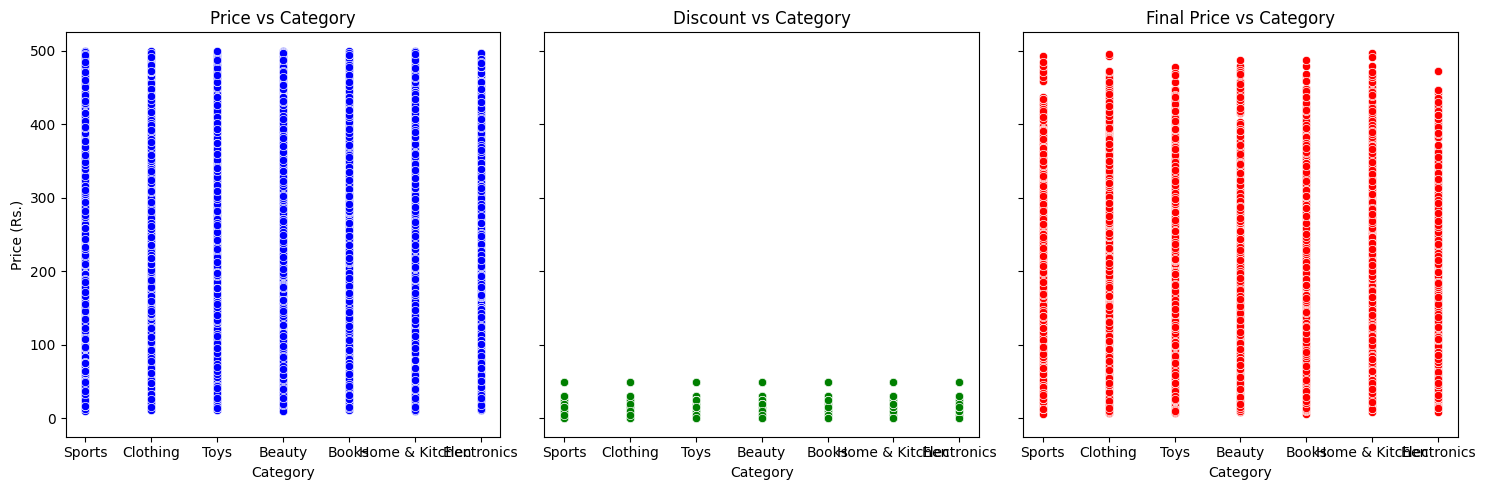

In [ ]:
# fit a multivariate linear regression of cholesterol onto exercise and age. Plot the regression lines corresponding to each of the age groups, overlaid with a scatterplot of the data. Use a different color for each age group. Comment.
price = "Price (Rs.)"
disc = "Discount (%)"
final = "Final_Price(Rs.)"

# Create subplots for separate scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Scatter plot for each price column
sns.scatterplot(ax = axes[0], data = df, x = "Category", y = price, color = "blue")
axes[0].set_title("Price vs Category")

sns.scatterplot(ax = axes[1], data = df, x = "Category", y = disc, color = "green")
axes[1].set_title("Discount vs Category")

sns.scatterplot(ax = axes[2], data = df, x = "Category", y = final, color = "red")
axes[2].set_title("Final Price vs Category")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# not helpful

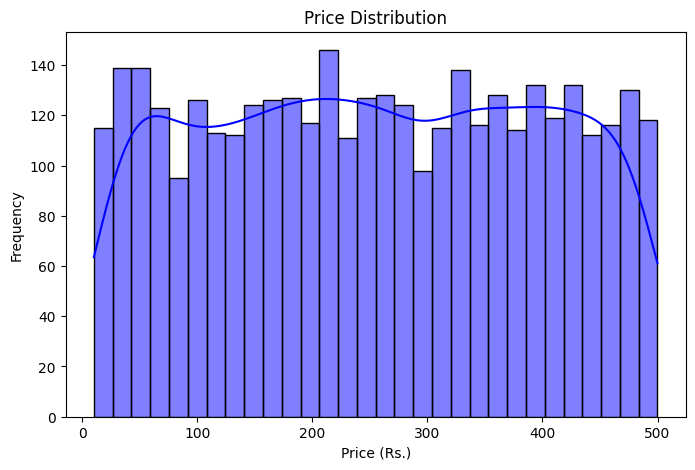

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price (Rs.)'], bins=30, kde=True, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price (Rs.)")
plt.ylabel("Frequency")
plt.show()

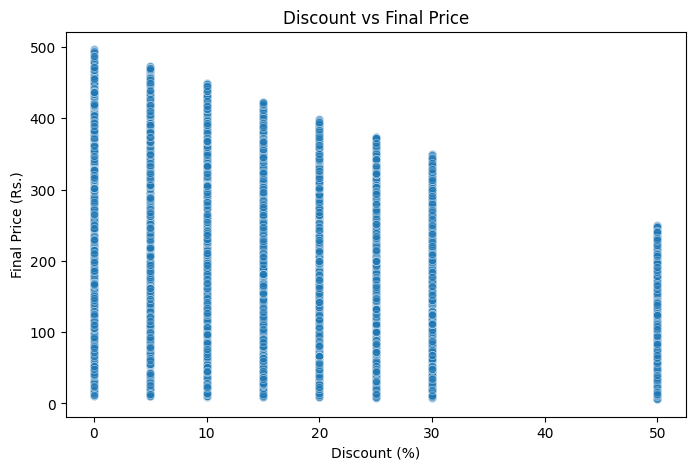

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Discount (%)"], y=df["Final_Price(Rs.)"], alpha=0.5)
plt.title("Discount vs Final Price")
plt.xlabel("Discount (%)")
plt.ylabel("Final Price (Rs.)")
plt.show()


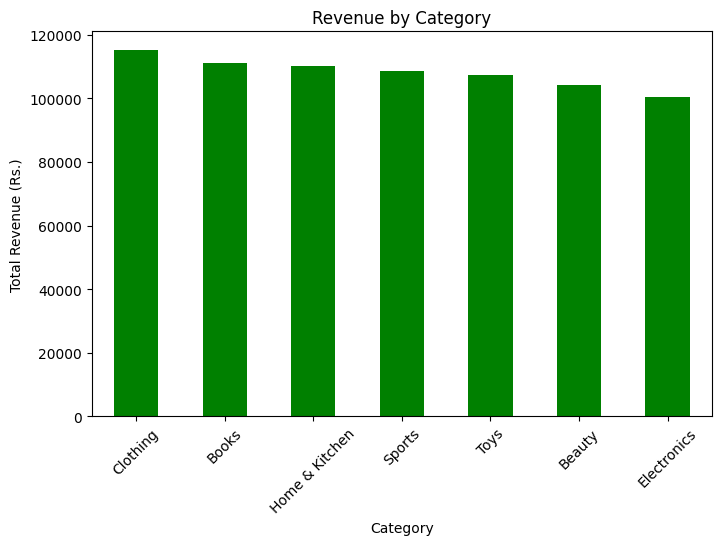

Product_ID
f414122f-e    1
fa0af2c6-1    1
df20c732-7    1
9c83496b-c    1
49cf6bb4-d    1
233f387c-1    1
48db1429-2    1
d858c042-1    1
2883c4ac-f    1
dadc64fc-7    1
Name: count, dtype: int64


In [ ]:
category_sales = df.groupby("Category")["Final_Price(Rs.)"].sum().sort_values(ascending=False)
category_sales.plot(kind="bar", figsize=(8,5), color="green")
plt.title("Revenue by Category")
plt.ylabel("Total Revenue (Rs.)")
plt.xticks(rotation=45)
plt.show()

top_products = df["Product_ID"].value_counts().nlargest(10)
print(top_products)

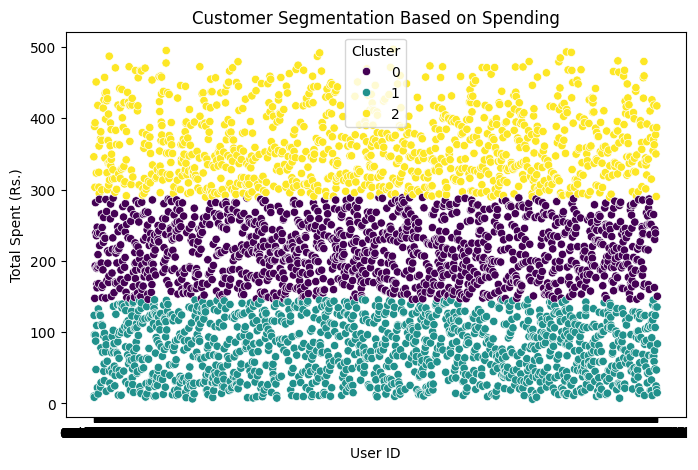

In [ ]:
# Aggregate total spending per customer
customer_spending = df.groupby("User_ID")["Final_Price(Rs.)"].sum().reset_index()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_spending["Cluster"] = kmeans.fit_predict(customer_spending[["Final_Price(Rs.)"]])

# Scatterplot of clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=customer_spending["User_ID"], y=customer_spending["Final_Price(Rs.)"], hue=customer_spending["Cluster"], palette="viridis")
plt.title("Customer Segmentation Based on Spending")
plt.xlabel("User ID")
plt.ylabel("Total Spent (Rs.)")
plt.show()

In [ ]:
df["Category"].unique()

array(['Sports', 'Clothing', 'Toys', 'Beauty', 'Books', 'Home & Kitchen',
       'Electronics'], dtype=object)

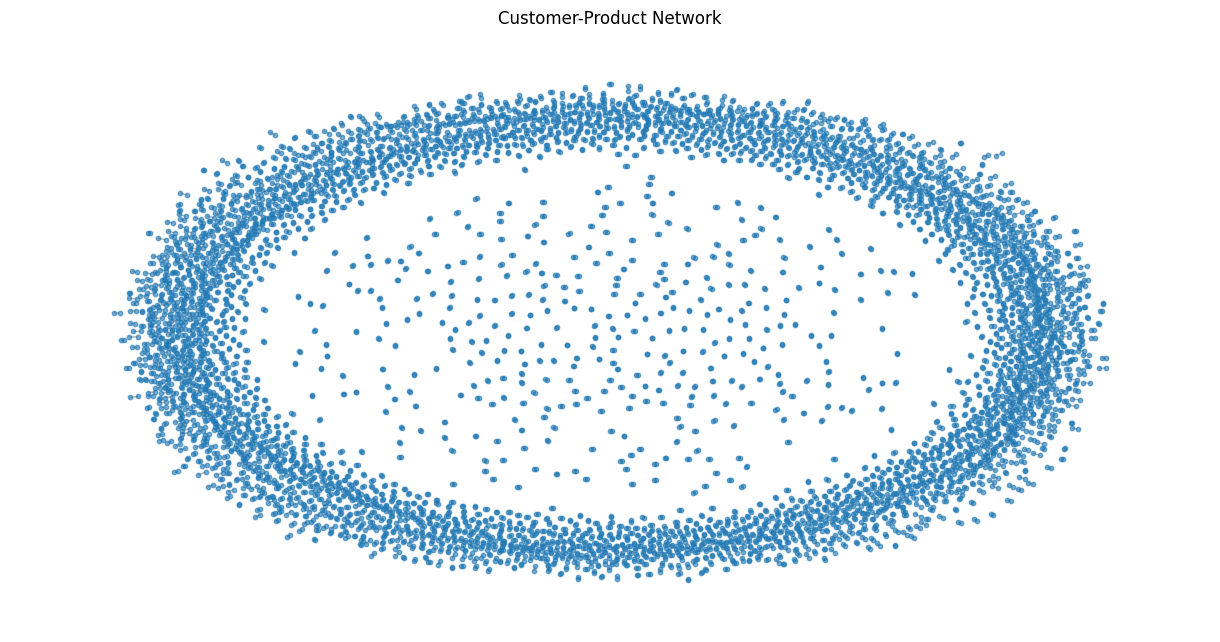

In [ ]:
# would like to color code ot determine clusterings...but maybe ill just do that in gephi
# cat_colors = {
#     'Sports': "red",
#     'Clothing': "blue",
#     'Toys': "yellow",
#     'Beauty': "red",
#     'Books': "green",
#     'Home & Kitchen': "grey",
#     'Electronics': "black"
# }

# Create a graph
G = nx.Graph()

# Add nodes: Customers and Products
customers = df["User_ID"].unique()
products = df["Product_ID"].unique()

G.add_nodes_from(customers, bipartite=0)  # Customers
G.add_nodes_from(products, bipartite=1)  # Products

# Add edges: Purchases
edges = list(zip(df["User_ID"], df["Product_ID"]))
G.add_edges_from(edges)

# Draw the graph (Bipartite Layout)
plt.figure(figsize=(12,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.6)
plt.title("Customer-Product Network")
plt.show()